# Machine Learning: Bicycle rentals

The goal of this project is to build a machine learning app that can help estimate the number of users per day based on a number of meteriological data. This

In this notebook, we will perform some feature engineering to be able to train an adequqte model.

#### Introducing the dataset

The dataset consists of  columns:

- Datetime: hourly date + timestamp 
- Seasons: {1 = spring, 2 = summer, 3 = fall, 4 = winter}
-  Holiday - whether the day is considered a holiday
- Workingday - whether the day is neither a weekend nor holiday
- Weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- Temp - temperature in Celsius
- Atemp - "feels like" temperature in Celsius
- Humidity - relative humidity
- Windspeed - wind speed
- Casual - number of non-registered user rentals initiated
- Registered - number of registered user rentals initiated
- Count - number of total rentals

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## Preliminary data exploration

### Understanding the data

First, I need to understand the contents of the dataset, that means:
- Knowing what data types are in the columns.
- Finding missing values.
- Converting datatypes, etc.

In [5]:
for i in df.columns:
    print(i)
    print(df[i].dtypes)
    print(df[i].nunique())

datetime
object
10886
season
int64
4
holiday
int64
2
workingday
int64
2
weather
int64
4
temp
float64
49
atemp
float64
60
humidity
int64
89
windspeed
float64
28
casual
int64
309
registered
int64
731
count
int64
822


In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [7]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

In [9]:
test_df=df[9063:]

In [10]:
test_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
9063,2012-09-01 00:00:00,3,0,0,1,30.34,34.090,62,7.0015,22,146,168,2012,9,1
9064,2012-09-01 01:00:00,3,0,0,1,29.52,34.850,74,8.9981,11,68,79,2012,9,1
9065,2012-09-01 02:00:00,3,0,0,1,28.70,32.575,70,11.0014,8,61,69,2012,9,1
9066,2012-09-01 03:00:00,3,0,0,1,28.70,32.575,70,7.0015,6,29,35,2012,9,1
9067,2012-09-01 04:00:00,3,0,0,1,28.70,32.575,70,0.0000,3,9,12,2012,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19


In [11]:
train_df = df[:9063]

In [12]:
train_df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day
9058,2012-08-19 19:00:00,3,0,0,2,26.24,30.305,73,8.9981,72,269,341,2012,8,19
9059,2012-08-19 20:00:00,3,0,0,2,26.24,30.305,73,12.9980,61,213,274,2012,8,19
9060,2012-08-19 21:00:00,3,0,0,3,25.42,29.545,78,6.0032,36,154,190,2012,8,19
9061,2012-08-19 22:00:00,3,0,0,2,25.42,29.545,78,11.0014,6,50,56,2012,8,19
9062,2012-08-19 23:00:00,3,0,0,2,25.42,29.545,73,0.0000,7,39,46,2012,8,19


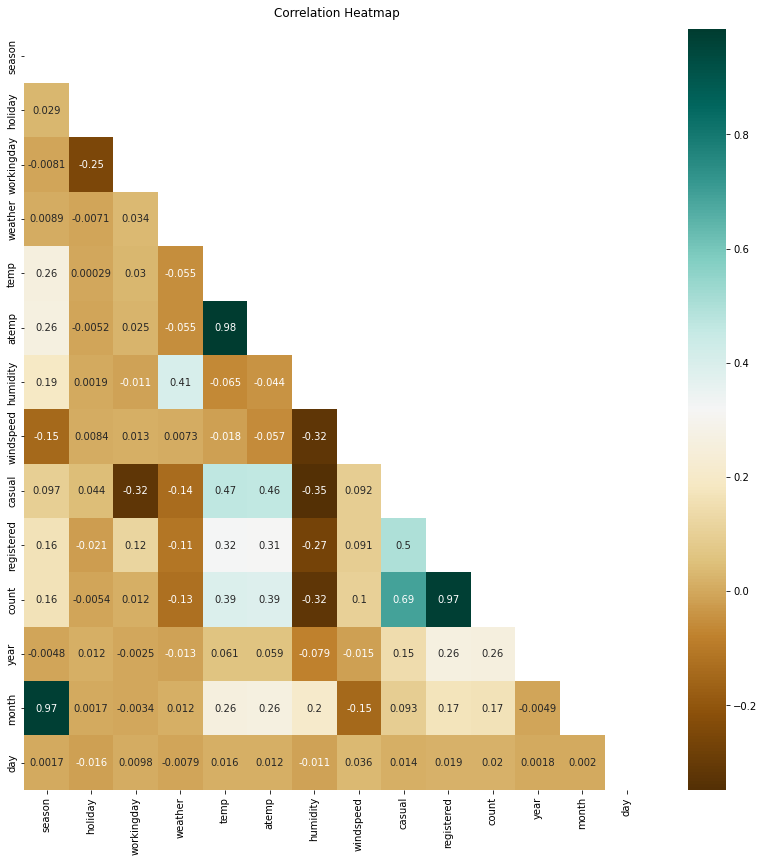

In [13]:
plt.figure(figsize=(14,14))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), annot = True, mask = mask, cmap = 'BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':12}, pad=12);


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
train_df.drop(columns=['casual', 'registered'], inplace=True)

/tmp/ipykernel_5093/775993782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['casual', 'registered'], inplace=True)


In [16]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9058,2012-08-19 19:00:00,3,0,0,2,26.24,30.305,73,8.9981,341,2012,8,19
9059,2012-08-19 20:00:00,3,0,0,2,26.24,30.305,73,12.9980,274,2012,8,19
9060,2012-08-19 21:00:00,3,0,0,3,25.42,29.545,78,6.0032,190,2012,8,19
9061,2012-08-19 22:00:00,3,0,0,2,25.42,29.545,78,11.0014,56,2012,8,19


In [17]:
train_df.to_csv(r'../vlib_ml_app/train_df.csv')
test_df.to_csv(r'../vlib_ml_app/test_df.csv')